# **METADATA**


**1.- Descripción de los datos.** Este dataset presenta información sobre campañas publicitarias en redes sociales. Permite analizar la efectividad de cada plataforma, el impacto en la audiencia y la rentabilidad de las campañas digitales. Al ser una fuente de datos con poca variabilidad y totalmente limpia, procedí a desordenarla e integrarle variabilidad a los datos con el objetivo de aprender las tecnicas de limpieza y normalización vistas en el curso. Este dataset consta de 200.000 registros, 16 columnas. Fuente: https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset/data


**2.- Diccionario de datos.**

Campaign_ID: Identificador único de cada campaña de marketing.

Campaign_Type:	Tipo de campaña ejecutada.

Channel_Used: Canal principal utilizado para la campaña.

Impressions:	Número de veces que se mostró el anuncio al público.

Clicks:	Número de clicks que recibió el anuncio.

Conversion_Rate:	Porcentaje de usuarios que realizaron la acción deseada después de ver/interactuar con el anuncio.

Acquisition_Cost:	Costo total de adquisición por campaña.

ROI:	Retorno sobre la inversión, mide la rentabilidad de la campaña.

Engagement_Score:	Indicador que mide el nivel de compromiso de la audiencia.

# **ANÁLISIS ABSTRACTO**

## **Objetivo Analítico**
El objetivo de este análisis es identificar qué tipos de campañas y canales publicitarios obtienen un mejor desempeño en términos de Conversion Rate y ROI, con el fin de optimizar la asignación de recursos y maximizar la rentabilidad de las inversiones en marketing.


**Contexto comercial**
Este proyecto de análisis de datos se centra en la optimización de la inversión en marketing de diversas empresas, utilizando datos históricos detallados de campañas. El objetivo es identificar qué combinaciones de canales (Channel_Used), audiencias objetivo (Target_Audience) y ubicaciones (Location) generan el mayor Retorno de la Inversión (ROI) con el menor Costo de Adquisición (Acquisition_Cost). Al cuantificar el rendimiento de cada estrategia, buscamos proveer insights accionables para maximizar la eficiencia del gasto y mejorar las futuras estrategias de adquisición de clientes.

**Audiencia**
 Este análisis está dirigido a Roles Ejecutivos y Gerentes de Marketing dentro de la organización, quienes son responsables de la toma de decisiones estratégicas sobre la asignación de presupuestos y el diseño de campañas.

**HIPÓTESIS**

H1: Rendimiento: ¿Cuál es el canal de marketing (Channel_Used) que genera el mayor Retorno de la Inversión (ROI)?

H2: Eficiencia:¿Existe una correlación positiva fuerte entre el Costo de Adquisición (Acquisition_Cost) y la Tasa de Conversión (Conversion_Rate)?

H3: Segmentación y Contenido: ¿Qué Tipo de Campaña (Campaign_Type) y Audiencia Objetivo (Target_Audience) ofrece la combinación más rentable?

H4: Ciertas temáticas de anuncios generan mayor interés que otras.

H5: Contexto Socioeconómico: ¿Existe una relación directa y positiva entre el Ingreso Medio (Median_Income_USD) y el ROI Promedio de las campañas por ubicación?

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!gdown https://drive.google.com/uc?id=1tFIfAanfpbCXtJWYGEna2ssmMHUvzWVu

Downloading...
From: https://drive.google.com/uc?id=1tFIfAanfpbCXtJWYGEna2ssmMHUvzWVu
To: /content/marketing_campaign_dataset_.csv
100% 28.2M/28.2M [00:00<00:00, 134MB/s] 


# **Visualización del Dataset**


In [6]:
df = pd.read_csv('marketing_campaign_dataset_.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1.0,Innovate industries,EMAIL,Men 18-24,30 DAYS,Google ads,0.04,"$9,373.00",6.0,CHICAGO,Spanish,506.0,11860.0,6.0,HEALTH & WELLNESS,2021-01-01
1,2.0,NEXGEN SYSTEMS,email,WOMEN 35-44,60 days,GOOGLE ADS,0.12,"$11,566.00",15.0,NEW YORK,German,25.0,7523.0,7.0,fashionistas,01/02/2021
2,3.0,Alpha innovations,Influencer,MEN 25-34,30 days,YOUTUBE,0.07,"$6,982.00",7.0,Los angeles,french,95.0,659.0,1.0,outdoor adventurers,01/03/2021
3,4.0,DATATECH SOLUTIONS,display,ALL AGES,60 days,YOUTUBE,0.11,"$187,860.00",6.0,MIAMI,MANDARIN,88.0,1820.0,7.0,health & wellness,04/01/2021
4,5.0,Nexgen systems,Email,MEN 25-34,15 days,YOUTUBE,0.05,"$16,452.00",6.0,los angeles,mandarin,379.0,561.0,3.0,Health & wellness,05/01/2021


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       198199 non-null  float64
 1   Company           198151 non-null  object 
 2   Campaign_Type     198137 non-null  object 
 3   Target_Audience   198119 non-null  object 
 4   Duration          198126 non-null  object 
 5   Channel_Used      198181 non-null  object 
 6   Conversion_Rate   198130 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               198137 non-null  float64
 9   Location          198058 non-null  object 
 10  Language          198122 non-null  object 
 11  Clicks            198142 non-null  float64
 12  Impressions       198081 non-null  float64
 13  Engagement_Score  198169 non-null  float64
 14  Customer_Segment  198210 non-null  object 
 15  Date              198076 non-null  object 
dtypes: float64(6), objec

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Campaign_ID,198199.0,99987.751114,57734.095760,1.00,49982.50,99976.00,149994.50,200000.00
Conversion_Rate,198130.0,0.080060,0.040601,0.01,0.05,0.08,0.11,0.15
ROI,198137.0,7.373418,4.619437,2.00,4.00,6.00,8.00,19.00
Clicks,198142.0,667.442536,621.538688,10.00,100.00,551.00,1000.00,19963.00
Impressions,198081.0,6648.515733,5829.825344,100.00,1002.00,5515.00,9999.00,192048.00
Engagement_Score,198169.0,5.494598,2.872494,1.00,3.00,5.00,8.00,10.00


# **Manipulación de Datos**

**Limpieza de formato**

In [9]:
# Sacar simbolo $ y convertir a tipo numerico
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace(r'[\$,]', '', regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')

In [10]:
#Limpieza
df['Duration'].unique()
import re
import numpy as np

def clean_duration(value):
    if isinstance(value, str):
        # Pasar todo a minúsculas y eliminar espacios
        value = value.strip().lower()
        # Buscar números dentro del texto
        match = re.search(r'\d+', value)
        if match:
            return int(match.group())  # Devuelve el número como entero
    return np.nan

In [11]:
df['Duration'] = df['Duration'].apply(clean_duration)

In [12]:
# Seleccionr columnas de tipo texto (object)
cols_text = df.select_dtypes(include='object').columns

# Excluir explícitamente la columna 'Duration' del procesamiento
cols_text = [col for col in cols_text if col.lower() != 'duration']

# Aplicar strip() y title() solo a las columnas de texto seleccionadas
for col in cols_text:
    df[col] = df[col].str.strip().str.title()

In [13]:
#Transformar formato
df['Campaign_ID'] = df['Campaign_ID'].astype(str).str.strip()  # Limpia espacios
df['Campaign_ID'] = pd.to_numeric(df['Campaign_ID'], errors='coerce')

**Chequeo y limpieza de nulos**





In [14]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,1801
Company,1849
Campaign_Type,1863
Target_Audience,1881
Duration,1874
Channel_Used,1819
Conversion_Rate,1870
Acquisition_Cost,1899
ROI,1863
Location,1942


In [15]:
# Visualizacion de Nulos
df[df['Campaign_ID'].isnull()]

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
133,NaN,Techcorp,Search,Men 25-34,30.0,Facebook,0.10,8030.0,18.0,Miami,English,1821.0,1876.0,7.0,Foodies,05/14/2021
252,NaN,Alpha Innovations,Search,All Ages,30.0,Email,0.08,105714.0,15.0,Houston,French,91.0,111.0,9.0,Tech Enthusiasts,2021-09-10
279,NaN,Nexgen Systems,Display,Men 25-34,NaN,Instagram,0.02,11640.0,7.0,Los Angeles,German,560.0,814.0,8.0,Health & Wellness,07/10/2021
459,NaN,Datatech Solutions,Email,Women 35-44,15.0,Google Ads,0.11,17313.0,6.0,Houston,French,67.0,369.0,5.0,Foodies,05/04/2021
546,NaN,Nexgen Systems,Influencer,Men 18-24,60.0,Google Ads,0.07,10088.0,13.0,New York,Mandarin,921.0,9943.0,10.0,Fashionistas,01/07/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199452,NaN,Techcorp,Email,Women 25-34,30.0,Facebook,0.05,3368.0,19.0,Houston,French,53.0,11017.0,8.0,Tech Enthusiasts,12/06/2021
199521,NaN,Datatech Solutions,Influencer,All Ages,15.0,Facebook,0.03,129098.0,NaN,Miami,Mandarin,1521.0,451.0,8.0,Fashionistas,NaN
199719,NaN,Alpha Innovations,Search,Women 35-44,15.0,Facebook,0.15,6406.0,7.0,Miami,Mandarin,1212.0,12541.0,5.0,Outdoor Adventurers,2021-03-06
199753,NaN,Techcorp,Search,All Ages,30.0,Youtube,0.07,19385.0,3.0,Miami,German,43.0,1379.0,4.0,Fashionistas,09/04/2021


In [16]:
# Transformación y Reemplazo de Nulos por "valor"
df['Campaign_ID'] = df['Campaign_ID'].fillna('S/Especificar')
df['Campaign_Type'] = df['Campaign_Type'].fillna('S/Especificar')
df['Target_Audience'] = df['Target_Audience'].fillna('S/Especificar')
df['Channel_Used'] = df['Channel_Used'].fillna('S/Especificar')
df['Location'] = df['Location'].fillna('S/Especificar')
df['Language'] = df['Language'].fillna('S/Especificar')
df['Customer_Segment'] = df['Customer_Segment'].fillna('S/Especificar')
df['Company'] = df['Company'].fillna('S/Especificar')

In [17]:
df[df['Location']== 'S/Especificar']

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
60,61.0,Datatech Solutions,Email,Men 25-34,45.0,Email,0.05,8785.0,2.0,S/Especificar,German,1900.0,9217.0,5.0,Fashionistas,03/02/2021
70,71.0,Alpha Innovations,Search,Men 25-34,30.0,Website,0.13,18201.0,6.0,S/Especificar,German,202.0,316.0,8.0,Tech Enthusiasts,03/12/2021
94,95.0,Nexgen Systems,Search,Men 18-24,45.0,Facebook,0.08,6278.0,5.0,S/Especificar,German,25.0,132.0,8.0,Foodies,04/05/2021
307,308.0,Innovate Industries,S/Especificar,Men 18-24,45.0,Facebook,0.14,185035.0,8.0,S/Especificar,Spanish,858.0,829.0,1.0,Tech Enthusiasts,04/11/2021
337,338.0,Alpha Innovations,Social Media,Women 35-44,15.0,Email,0.02,11045.0,7.0,S/Especificar,French,577.0,13950.0,8.0,Health & Wellness,2021-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199557,199558.0,Alpha Innovations,Search,All Ages,45.0,Youtube,0.12,18575.0,6.0,S/Especificar,Spanish,642.0,746.0,10.0,Health & Wellness,2021-09-25
199660,199661.0,Alpha Innovations,Email,Women 35-44,30.0,Google Ads,0.12,7174.0,4.0,S/Especificar,Mandarin,444.0,4247.0,2.0,Fashionistas,2021-01-06
199716,199717.0,Datatech Solutions,Email,All Ages,60.0,Instagram,0.12,101440.0,6.0,S/Especificar,Mandarin,102.0,572.0,3.0,Health & Wellness,2021-03-03
199783,199784.0,Alpha Innovations,Email,Men 25-34,60.0,Email,0.06,108339.0,3.0,S/Especificar,German,317.0,16015.0,9.0,Outdoor Adventurers,09/05/2021


In [18]:
#Transformacion y Reemplazo de Nulos por la media
df['Conversion_Rate'] = df['Conversion_Rate'].fillna(df['Conversion_Rate'].mean())

In [19]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,1863
Location,0


In [20]:
#Transformacion y Reemplazo de Nulos por la media
df['ROI'] = df['ROI'].fillna(df['ROI'].median())

In [21]:
# Conversion a tipo fecha, reemplazo fechas faltantes con forward fill o backward fill, o eliminar filas si es crítico.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].fillna(method='ffill')

/tmp/ipython-input-58668398.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [22]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,0
Location,0


In [23]:
# Ver tipo de dato
print(df['Duration'].dtype)

float64


In [24]:
# Reemplazar valores nulos con la mediana de cada columna
for col in ['Clicks', 'Impressions', 'Engagement_Score']:
    df[col] = df[col].fillna(df[col].median())

In [25]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,0
Location,0


In [26]:
# Sacar simbolo $ y convertir a tipo numerico
df['Acquisition_Cost'] = df['Acquisition_Cost'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')

#Reemplazo de valores nulos por la mediana
df['Acquisition_Cost'] = df['Acquisition_Cost'].fillna(df['Acquisition_Cost'].median())

In [27]:
# Reemplazar valores nulos con la mediana
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

In [28]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [29]:
df.dtypes

,0
Campaign_ID,object
Company,object
Campaign_Type,object
Target_Audience,object
Duration,float64
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,float64
ROI,float64
Location,object


#**INTEGRACIÓN Y ENRIQUECIMIENTO DE API World Bank Open Data**

Integración con API pública (World Bank Open Data):
Se utilizó la API abierta del Banco Mundial para enriquecer el dataset con información económica y demográfica real.
A través de la función get_worldbank_indicator, se consultaron los indicadores:

PIB per cápita (USD): NY.GDP.PCAP.CD

Población total: SP.POP.TOTL

In [36]:
df['Country'] = 'United States'


In [37]:
import requests

def get_worldbank_indicator(country_code, indicator_code):
    """
    Consulta la API pública del World Bank y devuelve el valor más reciente del indicador.
    """
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?format=json&per_page=1"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        try:
            value = data[1][0]['value']
            date = data[1][0]['date']
            return value, date
        except (KeyError, TypeError, IndexError):
            return None, None
    else:
        return None, None


In [40]:
#  API
gdp_value, gdp_year = get_worldbank_indicator('US', 'NY.GDP.PCAP.CD')
pop_value, pop_year = get_worldbank_indicator('US', 'SP.POP.TOTL')

# Asignar los mismos valores a todas las filas
df['GDP_per_capita_USD'] = gdp_value
df['GDP_year'] = gdp_year
df['Population_Total'] = pop_value
df['Pop_year'] = pop_year


In [41]:
df[['Location', 'Country', 'GDP_per_capita_USD', 'Population_Total']].head()


,Location,Country,GDP_per_capita_USD,Population_Total
0,Chicago,United States,85809.900385,340110988
1,New York,United States,85809.900385,340110988
2,Los Angeles,United States,85809.900385,340110988
3,Miami,United States,85809.900385,340110988
4,Los Angeles,United States,85809.900385,340110988


**Creación del DataFrame Limpio Final**

In [42]:
df.to_csv('dataset_enriquecido_con_api.csv', index=False)


#**EDA y Visualizaciones**

In [43]:
# Información general
df.info()

# Primeras filas
df.head()

# Resumen estadístico
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Company             200000 non-null  object        
 1   Campaign_Type       200000 non-null  object        
 2   Target_Audience     200000 non-null  object        
 3   Duration            200000 non-null  float64       
 4   Channel_Used        200000 non-null  object        
 5   Conversion_Rate     200000 non-null  float64       
 6   Acquisition_Cost    200000 non-null  float64       
 7   ROI                 200000 non-null  float64       
 8   Location            200000 non-null  object        
 9   Language            200000 non-null  object        
 10  Clicks              200000 non-null  float64       
 11  Impressions         200000 non-null  float64       
 12  Engagement_Score    200000 non-null  float64       
 13  Customer_Segment    200000 no

,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Country,GDP_per_capita_USD,GDP_year,Population_Total,Pop_year
count,200000,200000,200000,200000.000000,200000,200000.000000,200000.000000,200000.000000,200000,200000,200000.000000,200000.000000,200000.000000,200000,200000,200000,2.000000e+05,200000,200000.0,200000
unique,6,6,6,NaN,7,NaN,NaN,NaN,6,6,NaN,NaN,NaN,6,NaN,1,NaN,1,NaN,1
top,Techcorp,Search,Men 18-24,NaN,Email,NaN,NaN,NaN,Miami,Mandarin,NaN,NaN,NaN,Foodies,NaN,United States,NaN,2024,NaN,2024
freq,39860,39817,39865,NaN,33308,NaN,NaN,NaN,39851,39882,NaN,NaN,NaN,39850,NaN,200000,NaN,200000,NaN,200000
mean,NaN,NaN,NaN,37.429950,NaN,0.080060,33216.311815,7.360625,NaN,NaN,666.360785,6637.639650,5.490070,NaN,2021-07-01 22:09:07.200000,NaN,8.580990e+04,NaN,340110988.0,NaN
min,NaN,NaN,NaN,15.000000,NaN,0.010000,100.000000,2.000000,NaN,NaN,10.000000,100.000000,1.000000,NaN,2021-01-01 00:00:00,NaN,8.580990e+04,NaN,340110988.0,NaN
25%,NaN,NaN,NaN,30.000000,NaN,0.050000,6844.000000,4.000000,NaN,NaN,105.000000,1043.000000,3.000000,NaN,2021-04-02 00:00:00,NaN,8.580990e+04,NaN,340110988.0,NaN
50%,NaN,NaN,NaN,30.000000,NaN,0.080000,12024.000000,6.000000,NaN,NaN,551.000000,5515.000000,5.000000,NaN,2021-07-02 00:00:00,NaN,8.580990e+04,NaN,340110988.0,NaN
75%,NaN,NaN,NaN,45.000000,NaN,0.110000,17980.000000,8.000000,NaN,NaN,996.000000,9959.000000,8.000000,NaN,2021-10-01 00:00:00,NaN,8.580990e+04,NaN,340110988.0,NaN
max,NaN,NaN,NaN,60.000000,NaN,0.150000,199996.000000,19.000000,NaN,NaN,19963.000000,192048.000000,10.000000,NaN,2021-12-31 00:00:00,NaN,8.580990e+04,NaN,340110988.0,NaN


In [44]:
# Conteo de valores nulos
df.isnull().sum()


,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0
Language,0


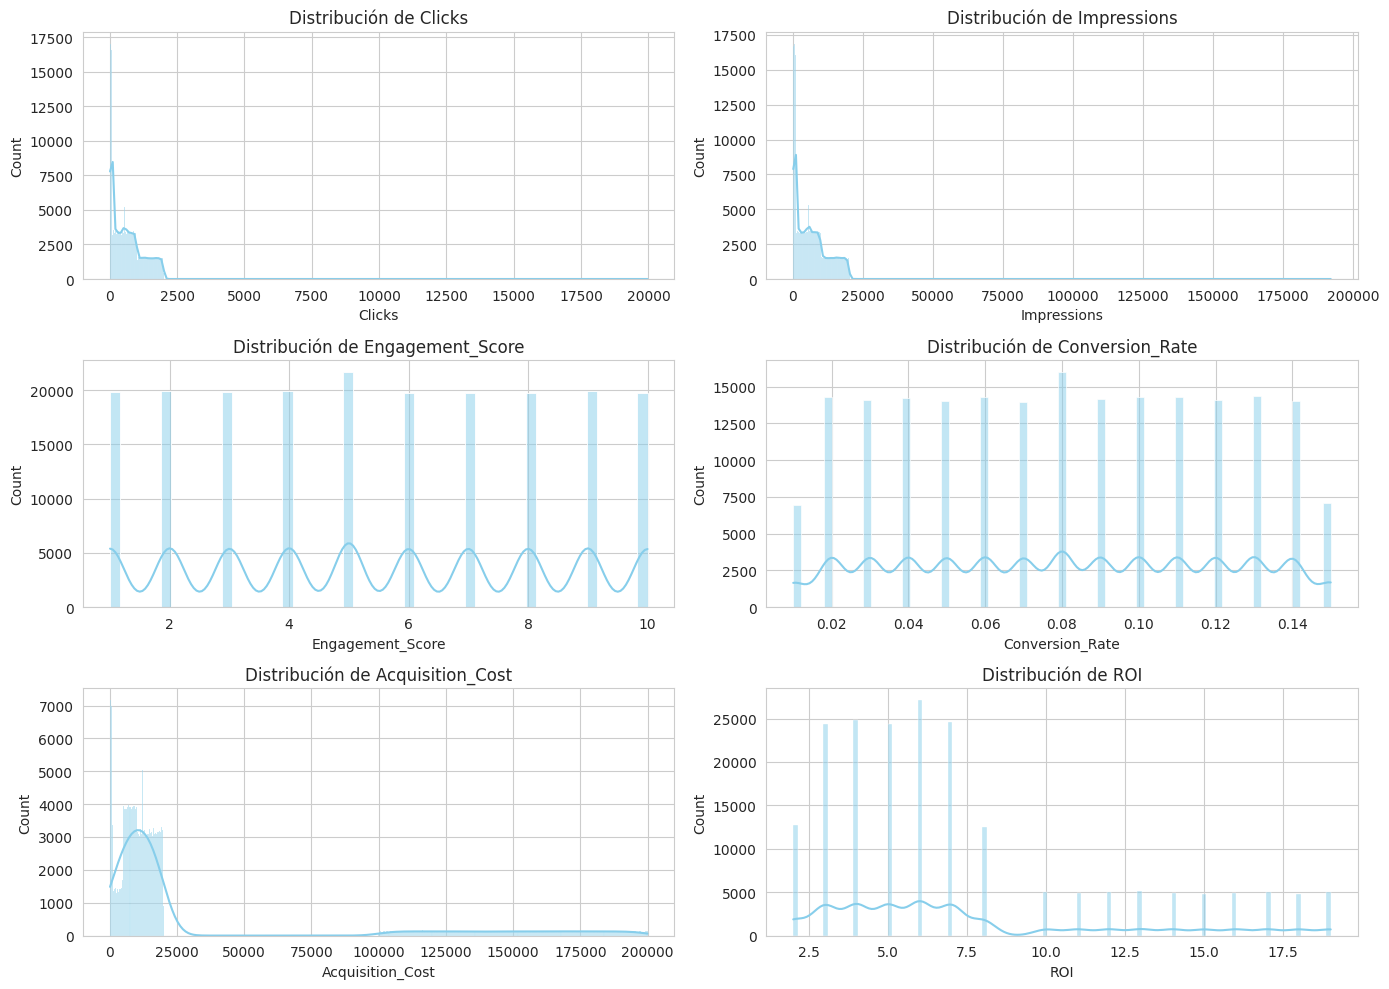

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas principales
num_vars = ['Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


Las variables numéricas muestran distribuciones altamente asimétricas, lo que indica que el rendimiento y la exposición de las campañas no están balanceados: unas pocas campañas dominan los resultados.
Además, la presencia de escalones en algunas métricas (como Engagement_Score y Conversion_Rate) sugiere que estas variables podrían provenir de métricas discretizadas o redondeadas durante la recolección

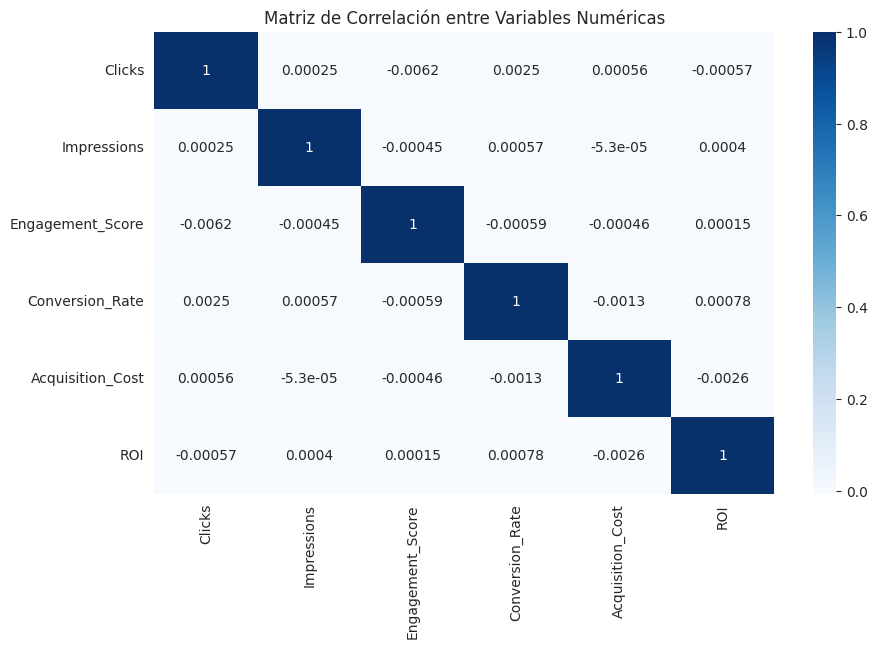

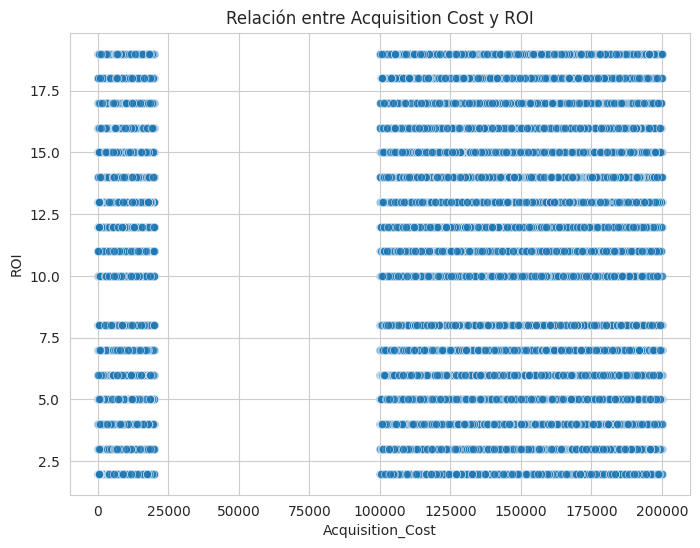

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Correlaciones numéricas generales
num_vars = ['Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Ejemplo de relación directa entre métricas clave
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', alpha=0.7)
plt.title('Relación entre Acquisition Cost y ROI')
plt.show()


Los resultados indican que las relaciones entre las variables numéricas son no lineales o complejas, por lo que sería conveniente probar modelos no lineales o segmentar por tipo de campaña o canal para encontrar patrones más finos.

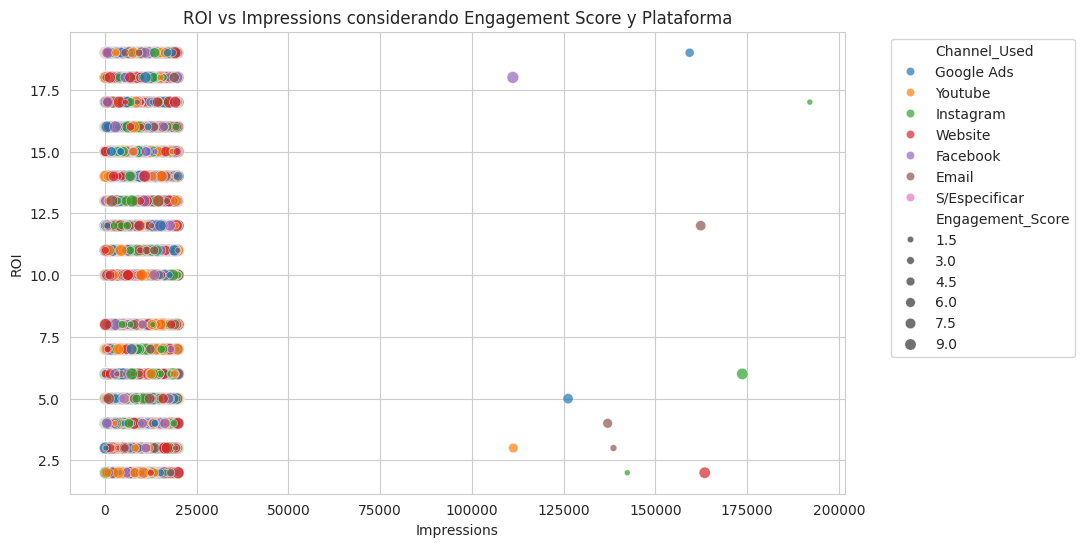

In [48]:
# Multivariado: ROI vs Impressions con Engagement y Plataforma
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x='Impressions',
                y='ROI',
                hue='Channel_Used',
                size='Engagement_Score',
                alpha=0.7)
plt.title('ROI vs Impressions considerando Engagement Score y Plataforma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

La rentabilidad (ROI) parece depender más del canal y del engagement que del volumen de impresiones.
Esto refuerza la importancia de invertir en contenido y plataformas con alta interacción, más que en ampliar alcance sin segmentación.

/tmp/ipython-input-2769884609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_channel.index, y=roi_channel.values, palette='viridis')


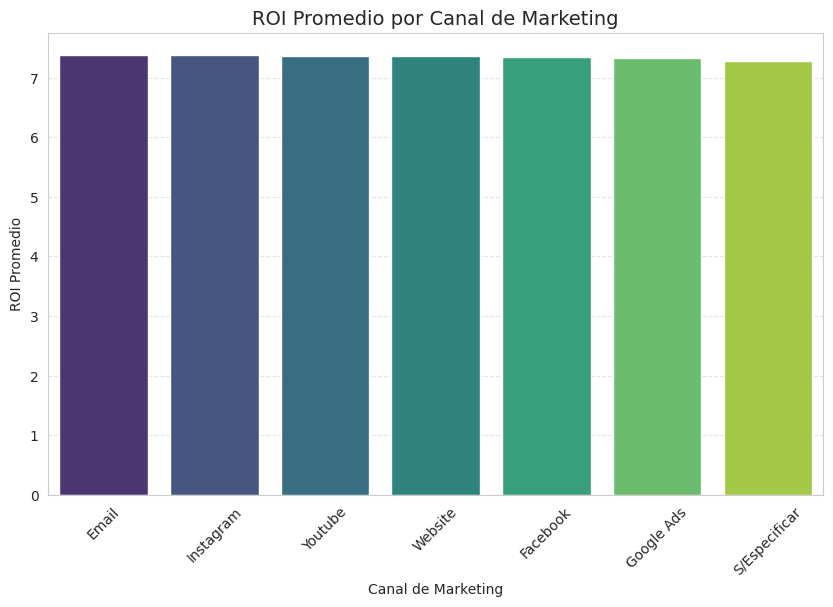

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular ROI promedio por canal
roi_channel = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=roi_channel.index, y=roi_channel.values, palette='viridis')
plt.title('ROI Promedio por Canal de Marketing', fontsize=14)
plt.xlabel('Canal de Marketing')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Insight
Se puede observar la carencia de variabilidad en el Retorno de la Inversion promedio entre los canales de Marketing analizados, por lo tanto, de esta forma no es posible definir como reasignar los recursos.

In [52]:
import plotly.express as px

# Agrupar por ubicación y calcular promedios
roi_location = df.groupby('Location')['ROI'].mean().reset_index()

fig = px.bar(
    roi_location,
    x='Location',
    y='ROI',
    title='ROI Promedio por Ubicación',
    labels={'Location': 'Ubicación', 'ROI': 'ROI Promedio'}
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#Insight
El ROI se mantiene estable entre ubicaciones, lo que sugiere que los factores económicos locales no explican diferencias sustanciales en la rentabilidad de las campañas.